# Q1 
### a) read & normalize

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time


data = pd.read_csv(r"E:\UNIVERSITY\Machine-Learning\HomeWork\HW1\Practical\data\house_prices.csv")
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'parking']]
Y = data['price']

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_normalized = (X - mean) / std

### b) Batch GD

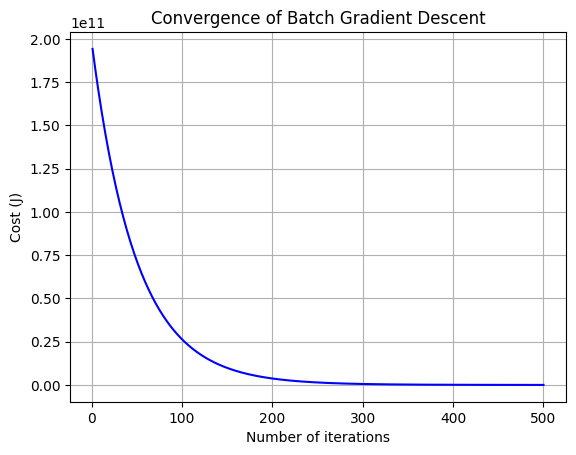

cost_GD_history: 35750805.85538056
Training Time: 0.22246 seconds


In [47]:
def compute_cost(X, Y, theta):
    m = len(Y)
    J = (1/(2*m)) * np.sum((np.dot(X, theta) - Y)**2)
    return J

def gradient_descent(X, Y, theta, learning_rate, iterations):
    m = len(Y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        theta = theta - (1/m) * learning_rate * (X.T @ (X @ theta - Y))
        cost_history[i] = compute_cost(X, Y, theta)

    return theta, cost_history




X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

theta = np.zeros(X_normalized.shape[1])

learning_rate = 0.01
iterations = 500

start_time = time.time()
theta_final, cost_history = gradient_descent(X_normalized, Y, theta, learning_rate, iterations)
training_time = time.time() - start_time

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Batch Gradient Descent')
plt.show()
print(f'cost_GD_history: {cost_history[-1]}')
print(f"Training Time: {training_time:.5f} seconds")



### c) evaluate that 950000 is fair or not ?

In [48]:
new_house = np.array([7700, 3, 2, 1, 1, 0, 0, 2])


# Normalizing features
new_house_normalized = (new_house - mean) / std

# Adding a bias term to the features
new_house_normalized = np.concatenate(([1], new_house_normalized))


# Predicting the price
predicted_price = np.dot(new_house_normalized, theta_final)

print(f"price: {predicted_price:.2f}")


price: 789902.41


#### As we can see model estimates about 800000 so 950000 is expensive

### d) Implementation of Mini-batch GD and SGD and comparison with GD

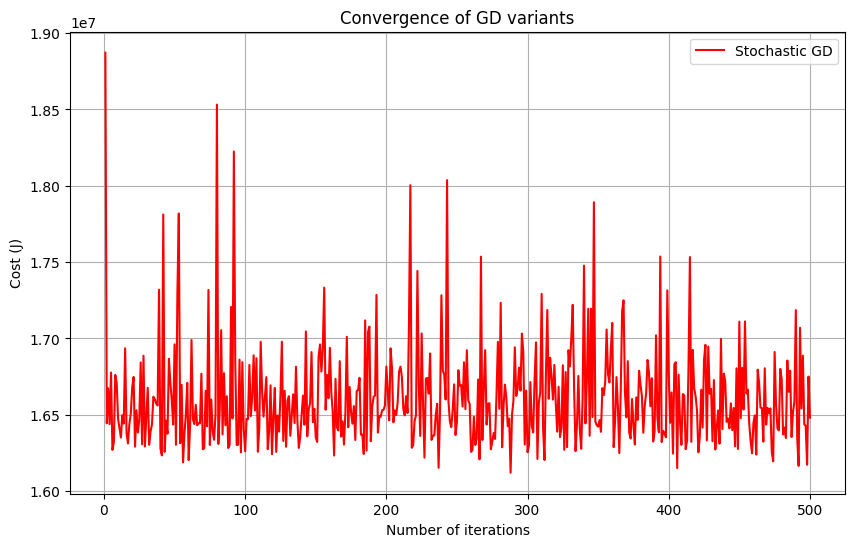

cost_history_stochastic: 16481586.544229953
Training Time: 54.99484 seconds


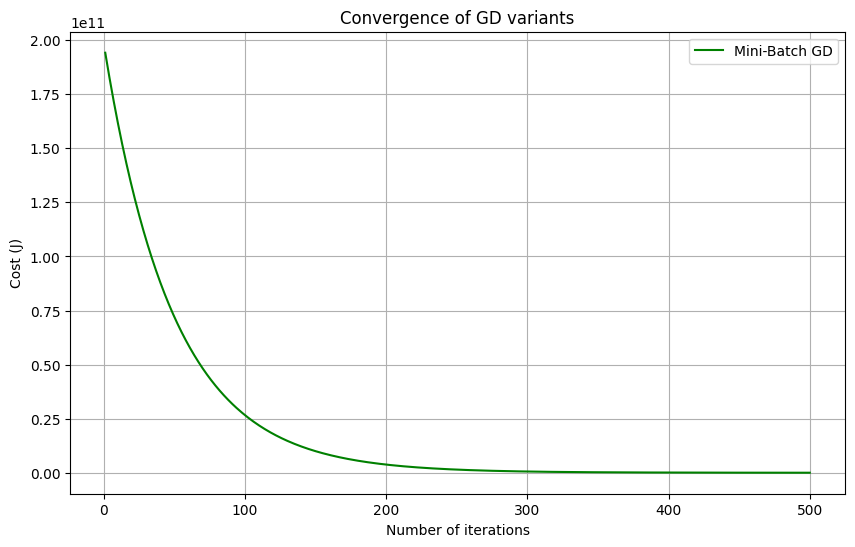

cost_history_mini_batch: 36300778.3947508
Training Time: 2.31000 seconds


In [49]:
def mini_batch_gradient_descent(X, Y, theta, learning_rate, iterations, batch_size):
    m = len(Y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        # Randomly shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        
        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            Y_batch = Y_shuffled[j:j+batch_size]
            theta = theta - (1/m) * learning_rate * (X_batch.T @ (X_batch @ theta - Y_batch))
        
        cost_history[i] = compute_cost(X, Y, theta)

    return theta, cost_history

def stochastic_gradient_descent(X, Y, theta, learning_rate, iterations):
    m = len(Y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
       
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        
        for j in range(m):
            X_point = X_shuffled[j:j+1]
            Y_point = Y_shuffled[j:j+1]
            theta = theta - learning_rate * (X_point.T @ (X_point @ theta - Y_point))
        
        cost_history[i] = compute_cost(X, Y, theta)

    return theta, cost_history


batch_size = 32 

#Mini-Batch GD
start_time = time.time()
theta_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X_normalized, Y, theta.copy(), learning_rate, iterations, batch_size)
training_time_mini = time.time() - start_time

# SGD
start_time = time.time()
theta_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_normalized, Y, theta.copy(), learning_rate, iterations)
training_time_sgd = time.time() - start_time



plt.plot(range(1, iterations + 1), cost_history_stochastic, label='Stochastic GD', color='red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of GD variants')
plt.legend()
plt.show()
print(f'cost_history_stochastic: {cost_history_stochastic[-1]}')
print(f"Training Time: {training_time_sgd:.5f} seconds")

plt.plot(range(1, iterations + 1), cost_history_mini_batch, label='Mini-Batch GD', color='green')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of GD variants')
plt.legend()
plt.show()
print(f'cost_history_mini_batch: {cost_history_mini_batch[-1]}')
print(f"Training Time: {training_time_mini:.5f} seconds")



<html dir="rtl" lang="fa-IR">
<p dir="rtl">
    بخاطر اینکه تعداد داده کم است کل آن در حافظه اصلی جا میشود و نیازی به مراجعه به حافظه جانبی نیست در نتیجه در این مثال GD سریع تر از Mini_batch GD است  
</p>
<p  dir="rtl">
      SGD اما در مقایسه با دو روش دیگر بخاطر عدم استفاده از پردازش موازی بسیار کند تر است</p>
    <p dir='rtl'> از نظر خطا هر 3 روش خطایی در order چند میلیون دارند</p> 

### e)impact of learning rate
if learning rate is very large the cost func output is like below plot because gradient in each iteration change its sign and can not converge 

end else if it is very small model take long time and need too much iteration to converge like second below plot

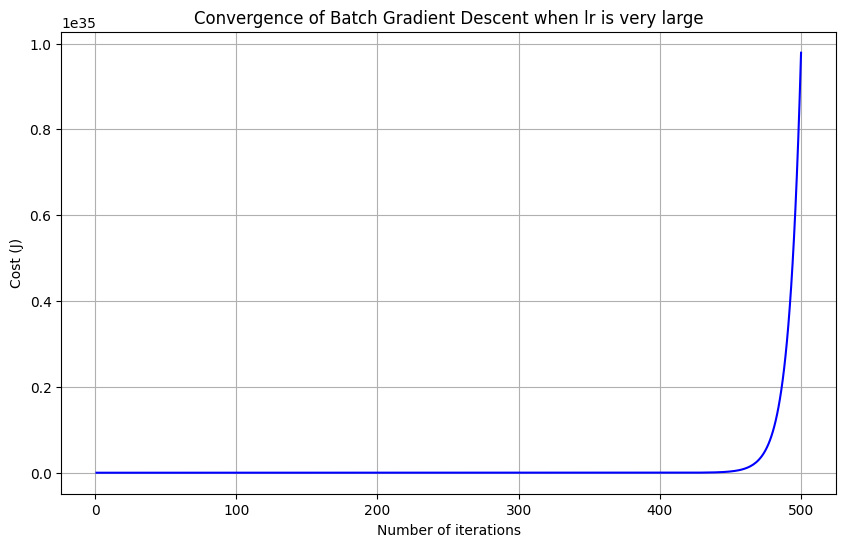

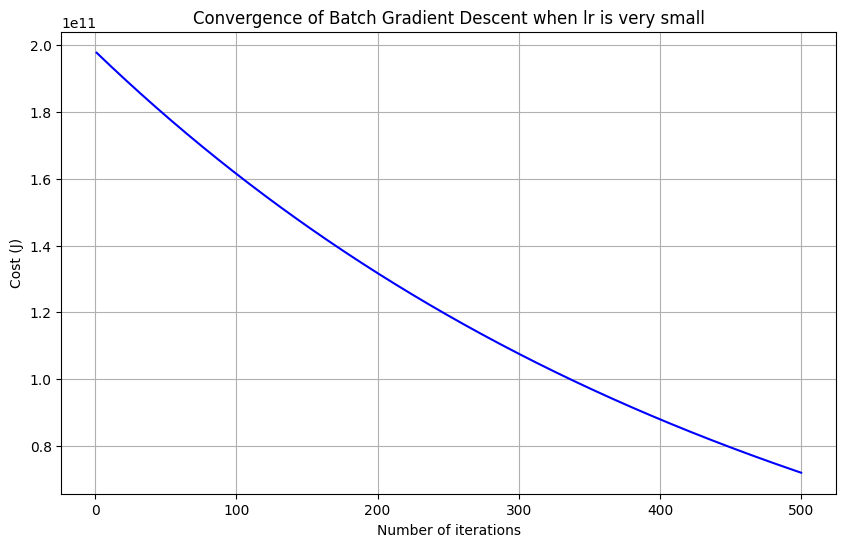

In [50]:
learning_rate = 1
iterations = 500

theta_final, cost_history = gradient_descent(X_normalized, Y, theta, learning_rate, iterations)

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Batch Gradient Descent when lr is very large')
plt.show()




learning_rate = 0.001
iterations = 500

theta_final, cost_history = gradient_descent(X_normalized, Y, theta, learning_rate, iterations)

plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Batch Gradient Descent when lr is very small')
plt.show()

In [51]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


data = pd.read_csv(r"E:\UNIVERSITY\Machine-Learning\HomeWork\HW1\Practical\data\house_prices.csv")
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'parking']]
Y = data['price']

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


linear_reg_model = LinearRegression()

start_time = time.time()
linear_reg_model.fit(X_normalized, Y)
training_time = time.time() - start_time


Y_pred = linear_reg_model.predict(X_normalized)


mse = mean_squared_error(Y, Y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Training Time: {training_time:.5f} seconds")


Mean Squared Error: 32164897.03
Training Time: 0.00491 seconds


<p dir="rtl">
خطا ی استفاده از کتابخانه های آماده در حد روش GD و Mini_batch GD است اما سرعت اجرآن بسیار سریع تر از روش پیاده سازی در قسمت ب است 
0.13 در برابر 0.002
شاید سرعت بالاتر ان بخاطر بهینه سازی های انجام شده در پیاده سازی آن باشد </p>

# Q2

#### a) load data and seperate it to test and training part


In [52]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time

# Load the dataset
data = pd.read_csv(r"E:\UNIVERSITY\Machine-Learning\HomeWork\HW1\Practical\data\Data.csv")

# Selecting features and response variable
X = data[['X']]
Y = data['Y']

from sklearn.model_selection import train_test_split

# Set random_state for reproducibility
random_state = 10

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)



#### b) seperate data to train and validate part and implement vectorized GD  and plot resulte for linear regression

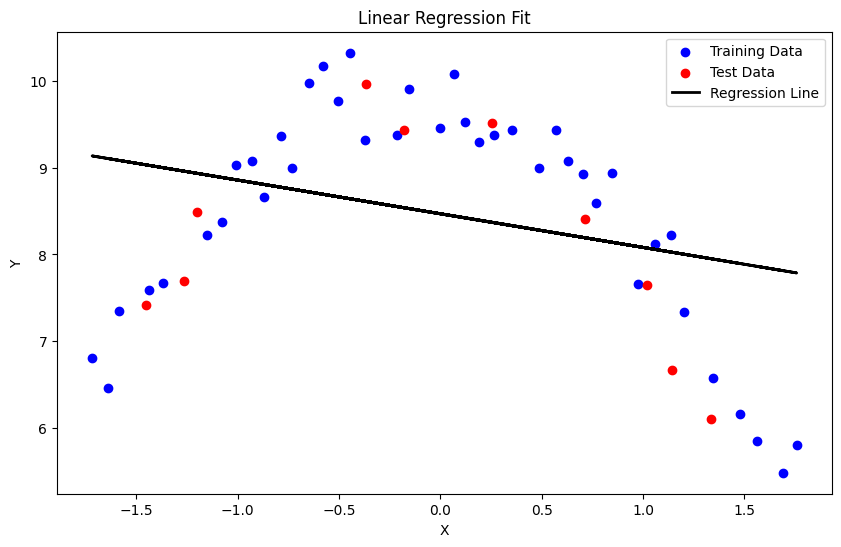

Mean Squared Error on Training Set: 1.5521272638838135
Mean Squared Error on Test Set: 1.3784518508026373
Training Time: 0.00872 seconds


In [53]:

def gradient_descent(X, y, learning_rate, num_iterations):
    m, n = X.shape
    theta = np.zeros(n)  # Initialize parameters

    for _ in range(num_iterations):
        predictions = np.dot(X, theta)
        
        errors = predictions - y

        theta = theta - (learning_rate / m) * np.dot(errors, X)

    return theta

def predict(X, theta):
    return np.dot(X, theta)

# Feature scaling 
def feature_scaling(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return np.c_[np.ones(X.shape[0]), X_scaled]

X_train_np = X_train.to_numpy()
Y_train_np = Y_train.to_numpy()
X_test_np = X_test.to_numpy()
Y_test_np = Y_test.to_numpy()


X_train_scaled = feature_scaling(X_train_np)
X_test_scaled = feature_scaling(X_test_np)


learning_rate = 0.01
num_iterations = 1000

start_time = time.time()
theta = gradient_descent(X_train_scaled, Y_train_np, learning_rate, num_iterations)
training_time = time.time() - start_time


Y_train_pred = predict(X_train_scaled, theta)
Y_test_pred = predict(X_test_scaled, theta)


plt.scatter(X_train_scaled[:, 1], Y_train_np, color='blue', label='Training Data')
plt.scatter(X_test_scaled[:, 1], Y_test_np, color='red', label='Test Data')
plt.plot(X_train_scaled[:, 1], Y_train_pred, color='black', linewidth=2, label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


mse_train = np.mean((Y_train_pred - Y_train_np)**2)
mse_test = np.mean((Y_test_pred - Y_test_np)**2)

print("Mean Squared Error on Training Set:", mse_train)
print("Mean Squared Error on Test Set:", mse_test)
print(f"Training Time: {training_time:.5f} seconds")


<p dir='rtl'>
    همانطور که مشاهده میشود از مقدار mse متعلق به training و test مدل به مقادیر آموزشی تا حدی چسبیده است و در موقع  test عملکرد بد تری دارد.
    
    
</p>    

#### c) close form solution 

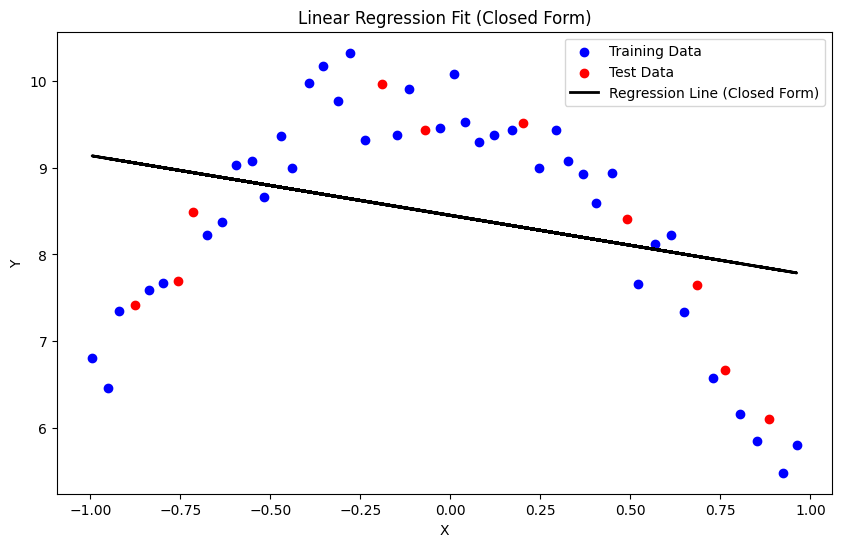

Mean Squared Error on Training Set (Closed Form): 1.5521271299497736
Mean Squared Error on Test Set (Closed Form): 1.3498372949300719
Training Time: 0.00099992752075195312 seconds


In [54]:

def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

def predict(X, theta):
    return np.dot(X, theta)


X_train_np = X_train.to_numpy()
Y_train_np = Y_train.to_numpy()
X_test_np = X_test.to_numpy()
Y_test_np = Y_test.to_numpy()

X_train_np = np.c_[np.ones(X_train_np.shape[0]), X_train_np]
X_test_np = np.c_[np.ones(X_test_np.shape[0]), X_test_np]

start_time = time.time()
theta_closed_form = normal_equation(X_train_np, Y_train_np)
training_time = time.time() - start_time

Y_train_pred_closed_form = predict(X_train_np, theta_closed_form)
Y_test_pred_closed_form = predict(X_test_np, theta_closed_form)


plt.scatter(X_train_np[:, 1], Y_train_np, color='blue', label='Training Data')
plt.scatter(X_test_np[:, 1], Y_test_np, color='red', label='Test Data')
plt.plot(X_train_np[:, 1], Y_train_pred_closed_form, color='black', linewidth=2, label='Regression Line (Closed Form)')
plt.title('Linear Regression Fit (Closed Form)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


mse_train_closed_form = np.mean((Y_train_pred_closed_form - Y_train_np)**2)
mse_test_closed_form = np.mean((Y_test_pred_closed_form - Y_test_np)**2)

print("Mean Squared Error on Training Set (Closed Form):", mse_train_closed_form)
print("Mean Squared Error on Test Set (Closed Form):", mse_test_closed_form)
print(f"Training Time: {training_time:.20f} seconds")



<p>در مواقعی که حجم داده کم است روش فرم بسته نسبت به نزول گرادیانی بسیار سریع تر است زیرا به طور فقط چند ضرب و وارون ماتریس باید حساب شود که این کار به طور موازی به سرعت صورت میگرد و همانطور که میدانیم جواب فرم بسته دقیقا برابر جواب است و به هاپر پارامتر ها وابسته نیست پس طبیعتا دقت بالاتری دارد
</p>
    
    

#### d) close form solution with 5 7 9 11 13 15 degree

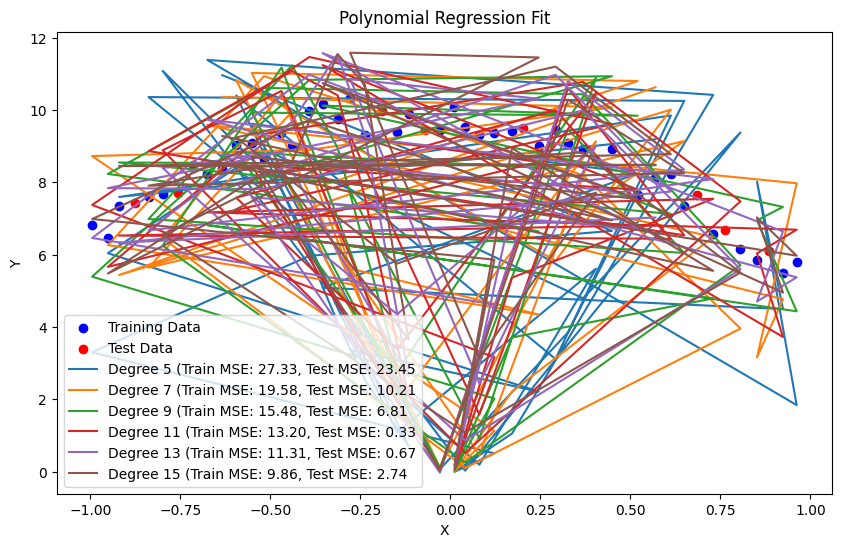

In [55]:
def add_polynomial_features(X, degree):
    return np.column_stack([X**i for i in range(1, degree + 1)])


def polynomial_regression(X, y, degree):
    X_poly = add_polynomial_features(X, degree)


    theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    y_pred = X_poly @ theta

    mse = np.mean((y_pred - y)**2)

    return y_pred, mse

X_train_np = X_train.to_numpy().reshape(-1, 1)  
Y_train_np = Y_train.to_numpy()
X_test_np = X_test.to_numpy().reshape(-1, 1)  
Y_test_np = Y_test.to_numpy()


degrees = [5, 7, 9, 11, 13, 15]


plt.scatter(X_train_np, Y_train_np, color='blue', label='Training Data')

plt.scatter(X_test_np, Y_test_np, color='red', label='Test Data')

for degree in degrees:
    Y_train_pred, mse_train = polynomial_regression(X_train_np, Y_train_np, degree)
    Y_test_pred, mse_test = polynomial_regression(X_test_np, Y_test_np, degree)

    # Plot the regression line
    plt.plot(X_train_np, Y_train_pred, label=f'Degree {degree} (Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}')

plt.title('Polynomial Regression Fit')
plt.xlabel('X')  
plt.ylabel('Y')
plt.legend()
plt.show()


<p dir='rtl'>
    همانطور که ملاحظه میشود در حالت چند 5 و 7 و 11 هم خطا آموزش و هم تست بالا است و مدل underfit است ولی در حالت 15 خطای آموزش کم ولی تست نسبت به 13 زیاد شده است مدل overfit شده است .
    اما در حالت 11 و 13 خطای تست کم است و خطا آموزش هم در حد معقولی است و نسبتا مدل مناسبی است.
</p>    

#### e) ridge regression for 13 and 15 degree

[ 9.59308534 -0.84408884 -2.8810261  -0.08461257 -1.45793529 -0.05464062
 -0.44198632  0.01552064  0.1341484   0.09413728  0.45979259  0.14988585
  0.64783699  0.17764976]
 
[ 9.39110408e+00 -5.89446263e-01 -2.06224888e+00 -1.29536099e-01
 -1.14494982e+00 -3.79108344e-02 -5.81296375e-01 -7.38827476e-03
 -2.75491995e-01  4.12015431e-03 -1.12978093e-01  8.34353637e-03
 -2.94643381e-02  9.45968717e-03]
 
[ 9.59105111 -0.83834757 -2.84137926 -0.08754987 -1.46721857 -0.0732125
 -0.5092481  -0.00974398  0.0214775   0.06900764  0.31501928  0.12905744
  0.48143247  0.16346508  0.57749634  0.17554986]
 
[ 9.39119889e+00 -5.89249471e-01 -2.06235631e+00 -1.29928884e-01
 -1.14561066e+00 -3.85358497e-02 -5.82139654e-01 -8.05132562e-03
 -2.76327749e-01  3.50661038e-03 -1.13726606e-01  7.81159050e-03
 -3.01008814e-02  9.01481732e-03  1.02943224e-02  8.83263993e-03]
 


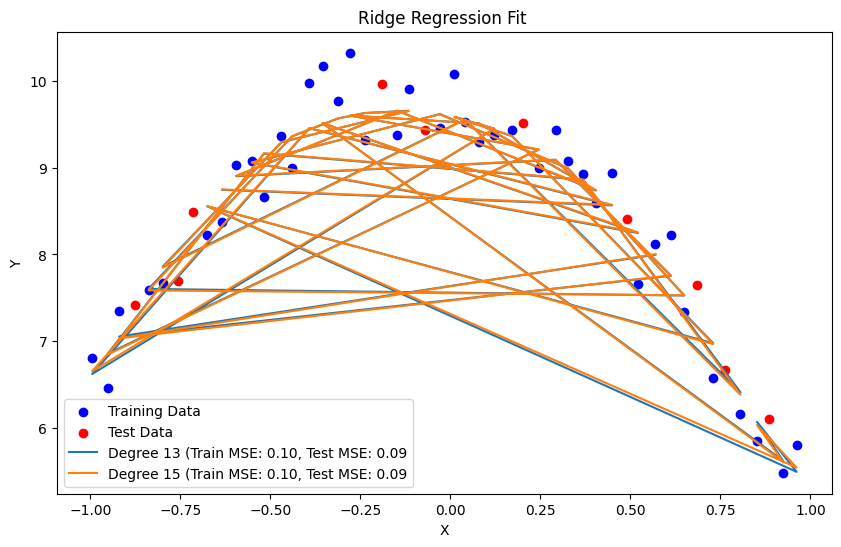

In [56]:
def add_polynomial_features(X, degree):
    return np.column_stack([X**i for i in range(1, degree + 1)])


def ridge_regression(X, y, degree, alpha):
    X_poly = add_polynomial_features(X, degree)

    X_augmented = np.column_stack([np.ones(X_poly.shape[0]), X_poly])
    identity_matrix = np.eye(X_augmented.shape[1])
    identity_matrix[0, 0] = 0  
    
    
    theta = np.linalg.inv(X_augmented.T @ X_augmented + alpha * identity_matrix) @ X_augmented.T @ y
    print(theta)
    print(" ")
    
    y_pred = X_augmented @ theta
    
    
    mse = np.mean((y_pred - y)**2)

    return y_pred, mse


X_train_np = X_train.to_numpy().reshape(-1, 1)  
Y_train_np = Y_train.to_numpy()
X_test_np = X_test.to_numpy().reshape(-1, 1) 
Y_test_np = Y_test.to_numpy()


degrees = [13, 15]
alpha = 0.2  # Ridge regularization parameter


plt.scatter(X_train_np, Y_train_np, color='blue', label='Training Data')

plt.scatter(X_test_np, Y_test_np, color='red', label='Test Data')

for degree in degrees:
    Y_train_pred, mse_train = ridge_regression(X_train_np, Y_train_np, degree, alpha)
    Y_test_pred, mse_test = ridge_regression(X_test_np, Y_test_np, degree, alpha)
    plt.plot(X_train_np, Y_train_pred, label=f'Degree {degree} (Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}')

plt.title('Ridge Regression Fit ')
plt.xlabel('X') 
plt.ylabel('Y')
plt.legend()
plt.show()


<p dir='rtl'>
     همانطور که مشاهده میشود  و میدانیم در ridge مدل به سمتی میرود که پارامتر های غیر مهم را به خاطر قسمت منظم ساز مقدار وزنشان را به زیر 1 برساند در نتیجه درجه 14 و 15 در این داده آمزشی کمک کننده نیستند و عملا نقشی در شکل نمودار نهایی ندارند همچنین سایر وزن هایی هم که نمیتوانند جریمه منظم ساز را پاس کنند وزنشان به شدت کاهش می یابد.
    
    </p>

#### f) lasso regression

[ 0.         -0.48233651 -2.85508901 -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.        ]
[ 0.         -0.43651338 -2.63280779 -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.        ]
[ 0.         -0.48233651 -2.85508901 -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]
[ 0.         -0.43651338 -2.63280779 -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.        ]


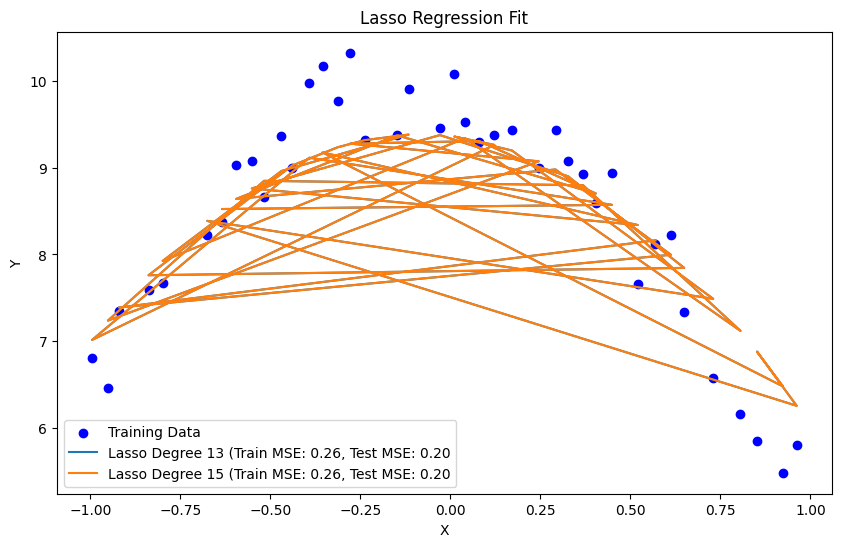

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

def lasso_regression(X, y, degree, alpha):
    model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
    model.fit(X, y)

    
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)


    coefficients = model.named_steps['lasso'].coef_
    print(coefficients)
    
    return y_pred, mse, coefficients


X_train_np = X_train.to_numpy().reshape(-1, 1) 
Y_train_np = Y_train.to_numpy()
X_test_np = X_test.to_numpy().reshape(-1, 1) 
Y_test_np = Y_test.to_numpy()


degrees = [13, 15]
alpha = 0.1 # Lasso regularization parameter

plt.scatter(X_train_np, Y_train_np, color='blue', label='Training Data')

for degree in degrees:
    Y_train_pred, mse_train, coefficients = lasso_regression(X_train_np, Y_train_np, degree, alpha)
    Y_test_pred, mse_test, _ = lasso_regression(X_test_np, Y_test_np, degree, alpha)

    plt.plot(X_train_np, Y_train_pred, label=f'Lasso Degree {degree} (Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}')

plt.title('Lasso Regression Fit')
plt.xlabel('X') 
plt.ylabel('Y')
plt.legend()
plt.show()


<p dir='rtl'>
همانطور که مشاهده میشود lasso  بر خلاف ridge  به جای انکه اگر ضریبی به زیر یک رسید آن را تقریبا بی اثر میداند بلکه سعی میکند آن ضرایب را صفر کند پس در قسمت پرینت ضرایب اکثر وزن ها lasso  صفر است ولی همان صفر ها در rigde عددی زیر به 1  است.    </p>